<a href="https://colab.research.google.com/github/jcsmcmendes/Step_Deep_Learning/blob/main/Deploy_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Let's Begin with Pre-trained Models

Deep learning can feel complex at first — but we don’t need to start from zero.

Modern neural networks like VGG16, ResNet, or MobileNet have already been trained on millions of images. These pre-trained models know how to recognize animals, vehicles, tools, food, and much more.

🔍 In this notebook, you'll:

    Load a real-world deep learning model used in industry

    Run it on images in just a few lines of code

    See how confident the model is in its predictions

    Start thinking critically about what it gets right — and wrong

💡 This is our first hands-on step into the world of deep learning — not by building from scratch, but by learning from the best.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import tensorflow as tf

In [2]:
# Step 1: Load the pre-trained VGG16 model + weights trained on ImageNet
model = VGG16(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [24]:
# Step 2: Load and preprocess the image (can replace this with a local file)
img_path = tf.keras.utils.get_file('tusker.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/7/70/2005-bandipur-tusker.jpg')


2135130/2135130 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


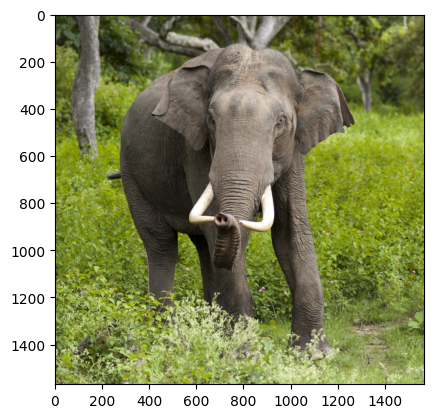

In [25]:
# Step 3: Show image
img = image.load_img(img_path)
plt.imshow(img)

In [26]:
# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # VGG16 expects 224x224
img_array = image.img_to_array(img)# Convert the image to a NumPy array (height, width, channels).
img_batch = np.expand_dims(img_array, axis=0)# Add a batch dimension to the image (1, height, width, channels), since the model expects a batch of images as input.
img_preprocessed = preprocess_input(img_batch)# Preprocess the image using the same normalization used during VGG16 training.
# This includes converting RGB to BGR and subtracting the ImageNet mean values.

In [29]:
# Predict
predictions = model.predict(img_preprocessed)
decoded = decode_predictions(predictions, top=3)[0]# Decode the prediction scores into human-readable class labels.
# 'top=3' returns the 3 most likely classes along with their confidence scores.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


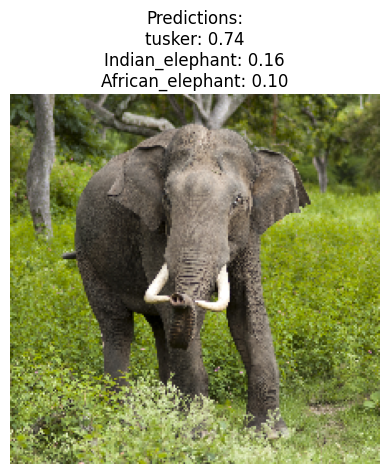

In [28]:
# Show image and predictions
plt.imshow(img)
plt.axis('off')
plt.title("Predictions:\n" + "\n".join([f"{label}: {prob:.2f}" for (_, label, prob) in decoded]))
plt.show()